Allison Forte

Assignemnt 7.2: (7.1; 8.1 & 8.2)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

# 7.1
Using data from the NSFG, make a scatterplot of birth weight versus mother's age. Plot percentiles of birth weight versus mothers age. Compute Pearson's and Spearman's correlations. How would you characterize the relationships between these variables. 

In [134]:
# load data

import numpy as np
import thinkstats2
import thinkplot
import first
import pandas as pd

live, firsts, others = first.MakeFrames()
live = live.dropna(subset = ['agepreg', 'totalwgt_lb'])
ages = live.agepreg
weights = live.totalwgt_lb

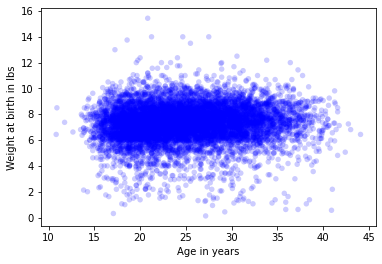

In [135]:
# Scatterplot of Birth weight versus Mother's age

thinkplot.Scatter(ages, weights)
thinkplot.Config(xlabel = 'Age in years', ylabel = 'Weight at birth in lbs')

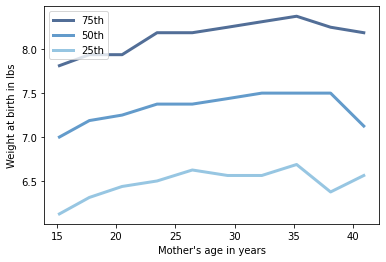

In [136]:
# Plot percentiles of birth weight versus mothers age

bins = np.arange(10, 50, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

plot_ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    plot_weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(plot_ages, plot_weights, label = label)

thinkplot.Config(xlabel = 'Mother\'s age in years', ylabel = 'Weight at birth in lbs', legend = True)

In [137]:
# Compute Pearson's and Spearman's correlations

# Covariance function from ThinkStats2
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# Correlation function
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# Spearman's correlation function
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

print('Correlation equals', Corr(ages, weights))
print('Spearman Correlation equals', SpearmanCorr(ages, weights))

Correlation equals 0.06883397035410908
Spearman Correlation equals 0.09461004109658226


In [138]:
# Characterize the relationships between these variables

# Based on the analysis completed there does not appear to be a strong relationship between the 2 variables. 
# First, the scatterplot shows a possible slightly positive association between the 2 variables but the relationship is difficult to confirm through the scatter plot alone.
# Plotting the percentiles shows that there is potentially a non-linear relationship between the variables. This is suggested because the 25th percentile shows a steeper slope than the other 2 percentile lines. 
# Finally, looking at the correlation and Spearman correlation we can confirm there is a slightly positive relationship between the 2 variables but it is weak. The difference between the 2 correlation calculations indicate the possibility of a non-liniear relationship.


# 8.1
In this chapter we used x̄ and median to estimate µ and found that x̄ yeilds lower MSE. Also, we used S^2 and S^2(n-1) to estimate σ, and found that S^2 is biased and S^2(n-1) is unbiases. 

Repeat the experiments to see if x̄ and median are biased estimates of µ. Also check whether S^2 or S^2(n-1) yeilds a lower MSE.


In [139]:
def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)


def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)


def Mean_Error_Estimate(n, iters):
    mu = 0
    sigma = 1
    means = []
    medians = []
    
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Exercise 8.1 first experiment')
    print('Mean error xbar:', MeanError(means, mu))
    print('Mean error median:', MeanError(medians, mu))
    
    
def RMSE_Estimate(n, iters):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Exercise 8.1 second experiment')
    print('RMSE biased:', RMSE(estimates1, sigma**2))
    print('RMSE unbiased:', RMSE(estimates2, sigma**2))
    
    
Mean_Error_Estimate(7, 100000)

RMSE_Estimate(7, 100000)

Exercise 8.1 first experiment
Mean error xbar: 0.0016788688190158304
Mean error median: 0.0007545418924156671
Exercise 8.1 second experiment
RMSE biased: 0.5162820621651794
RMSE unbiased: 0.5795177744857646


In [140]:
# As we run the first experiment with larger and larger sample sizes, the mean error for x̄ and median become smaller.
# This indicates that neither x̄ nor median are biased estimates of µ.

# Additionally, we can confirm that the biased RMSE is infact bias because there is a consistent gap between that 
# calculation and the unbiased RMSE. 
# Becuase the gap does not decrease as the sample size increases we can identify this as biased. 


# 8.2
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

The standard error in this experiment is 0.8175845943514489
The 90% confidence interval in this experiment is (1.2737677633830977, 3.637648387154086)


0.8175845943514489

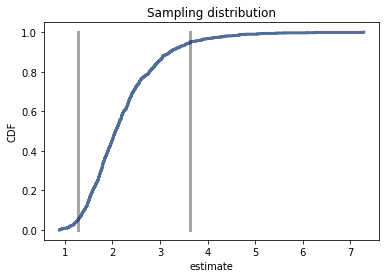

In [141]:
# Simulate this experiment 1000 times, plot the sampling distribution of the estimate L,
# compute the standard error of the estimate and the 90% confidence interval

import random


def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)


def VertLine(x, y=1):
    thinkplot.Plot([x, x], [0, y], color='gray')

        
def SimulateSample(lam, n, iters):
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('The standard error in this experiment is', stderr)

    cdf = thinkstats2.Cdf(estimates)
    
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('The 90% confidence interval in this experiment is', ci)
   
    VertLine(ci[0])
    VertLine(ci[1])
    
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate', ylabel='CDF', title='Sampling distribution')  

    return stderr

SimulateSample(2, 10, 1000)

The standard error in this experiment is 0.8229166230541388
The 90% confidence interval in this experiment is (1.2782819338001994, 3.6973882436115058)
The standard error in this experiment is 0.5136738032828106
The 90% confidence interval in this experiment is (1.4164513778062704, 3.0568173983478437)
The standard error in this experiment is 0.2922243296358877
The 90% confidence interval in this experiment is (1.6147873501714842, 2.574085273362424)
The standard error in this experiment is 0.20084167025978744
The 90% confidence interval in this experiment is (1.714972355299305, 2.384611185286762)


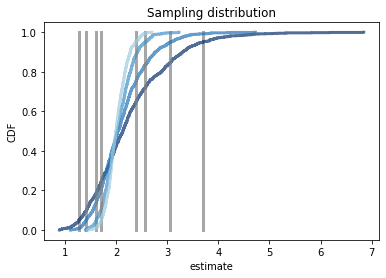

In [142]:
# Repeat the experiment with a few different values of n

stderr_list = []
stderr_list.append(SimulateSample(2, 10, 1000))
stderr_list.append(SimulateSample(2, 20, 1000))
stderr_list.append(SimulateSample(2, 50, 1000))
stderr_list.append(SimulateSample(2, 100, 1000))
stderr_list
n_values = [10, 20, 50, 100]

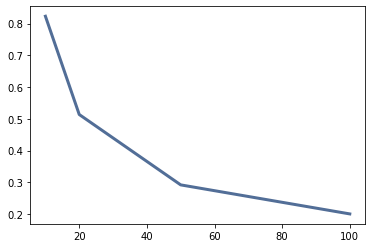

In [143]:
# Compute the standard error of the estimate and the 90% confidence interval
thinkplot.plot(n_values, stderr_list)

In [144]:
# As the sample size (n) increases, the standard error decreases. 
# The confidence interval gets narrower as n increases as well. 